# Samples tests

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

## Overview

### Z versus t-tests

In case of small samples use t-distribution (`n < ~30` samples) which has fatter tails. Also use the Student's t test if the true variance of the populations from which the samples are extracted is unknown; and use the z test if the true variance s² of the population is known. Check out this [blog](https://keydifferences.com/difference-between-t-test-and-z-test.html) for a comparison of the two.

### Test types

There are three main types of z- and/or t-test, according to this [blog](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f):
1. A **One sample t-test** tests the mean of a single group against a known mean.
2. An **Independent Samples t-test** compares the means for two groups.
3. A **Paired sample t-test** compares means from the same group at different times (say, one year apart).

<br\>
![](https://keydifferences.com/wp-content/uploads/2018/03/t-test-vs-z-test.jpg)

### Hypotheses

One-tailed vs. two-tailed tests:

H0: mu = value

H1: mu > value (one-sided)

OR

H1: mu != value (two-sided).

The kicker with one-tailed tests is that they only measure, for example, whether the new drug is better than the old one. They don’t measure whether the new drug is the same as the old drug, or if the old drug is actually better than the new one. 

This makes one-tailed tests convenient as they require less traffic than two-tailed ones (altough dangerous!). They show results quickly (even if those results aren’t as statistically rigorous), and, as a result, unsophisticated users love them. Be aware of the implications of not testing two-sides when using a one-sided test.

### Statistical power

Statistical power is simply the likelihood that the difference you’ve detected during your experiment actually reflects a difference in the real world

### P-values

Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. 

P-values are often compared with a pre-set significance level alpha, the probability of making a Type 1 error. Alpha is often set to 0.05, such that the confidence interval is 95% (1-0.05).

## 0. Requirements for Z-test

There's quite some [assumptions](https://www.statisticssolutions.com/manova-analysis-one-sample-t-test/)
1. enough samples (otherwise use t distribution)
2. normal distributed data (Q-Q plot and histogram)
3. no outliers. (check for it using boxplots! - highly distorts results)
4. continous variable
5. samples are independent of one another

### Testing normality 

Assess normality by looking at histogram and Q-Q plot. 

In [3]:
# sample = np.random.randint(0, high=4, size=30)
sample = np.random.poisson(3, size=30)

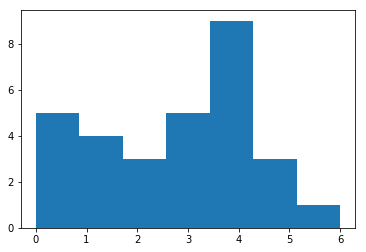

In [4]:
# fig, ax = plt.subplots(1, 1, figsize=(16, 6))
plt.hist(sample, bins=len(np.unique(sample)));

In [5]:
from scipy import stats

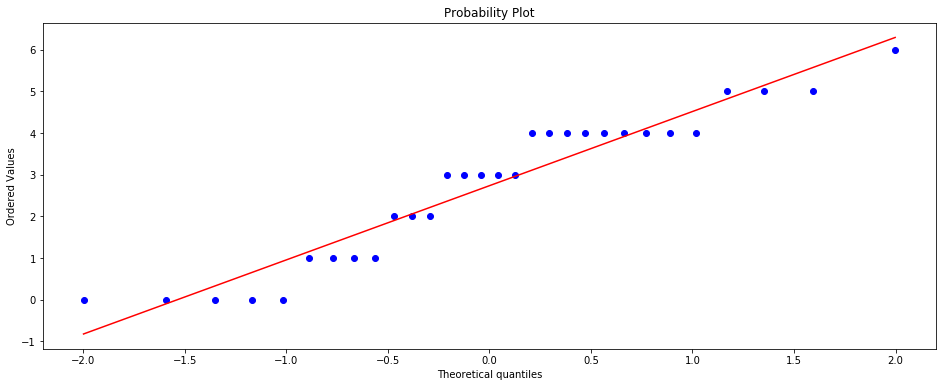

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
res = stats.probplot(sample, plot=ax)

### Continuous variable

What to do in discrete cases? Obviously, not all data is completely continuous as we are not going into decimals forever. This means there is always some form of discreteness. Therefore, manual inspection by looking/observing if the data looks like a normal distribution is sufficient. 

### Testing for outliers

Use a boxplot to check.

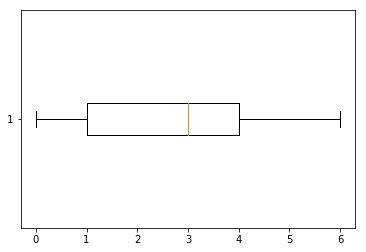

In [7]:
plt.boxplot(sample, vert=False);

## 1. One sample tests 

### T-test

Python implementation: [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html)

In [8]:
from scipy.stats import ttest_1samp

In [9]:
test_value = 2.6

stat, pval = ttest_1samp(sample, popmean=test_value)  # two-sided only
print('{0:0.3f}'.format(pval))

0.685


This test does a two-tailed test only. As the distribution is symmetrical, it follows that a one-tailed test can be determined from the output [manually](https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy): 

> Given p and t values from a two-tailed test, you would reject the null hypothesis of a greater-than test when `p/2 < alpha and t > 0`, and of a less-than test when `p/2 < alpha and t < 0`.

In [10]:
print('p-val: {0:0.3f}'.format(pval/2))  # evaluate one-sided
print('t-stat: {0:0.3f}'.format(stat))

p-val: 0.342
t-stat: 0.410


### Z-test

Remember that this test assumes normality of the sample! Also it requires a significant amount of samples. If both not present, use a t-test which has fatter tails.

Python implementation: `statsmodels`. Both for one-sample and for two-sample case:

* [`ztest`](http://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html#statsmodels.stats.weightstats.ztest) allows you to compare two means, assuming they are independent and have the same standard deviation.
* [`CompareMeans.ztest_ind`](http://www.statsmodels.org/devel/generated/statsmodels.stats.weightstats.CompareMeans.ztest_ind.html) if you need to compare means from distributions with different standard deviation.

In [11]:
from statsmodels.stats.weightstats import ztest

In [12]:
stat, pval = ztest(sample, value=test_value, alternative='larger')  # two-sided by default
print('{0:0.3f}'.format(pval))

0.341


### Calculating sample size

`statsmodels` has classes that help you calculate sample size. For example, for the one-sample t-test you can solve for any one parameter of the test with [`statsmodels.stats.power.tt_solve_power`](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_solve_power.html#statsmodels.stats.power.tt_solve_power)

## 2. Independent samples test

### T-test

For t-tests use [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html).

These tests do a two-tailed test only. As the distribution is symmetrical, it follows that a one-tailed test can be determined from the output [manually](https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy).

### Z-test

For z-tests, use `statsmodels` Python implementation as mentioned above. Both for one-sample and for two-sample case.


## 3. Paired sample t-test

TBD.